<a href="https://colab.research.google.com/github/kasalehi/CNNTensorflow/blob/main/CNN_with_tensorflowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##lets hnads on the CNN (convolutional neural network using tensorflow and keras)
1. load data
2. preparing the data '
3. rescaling or renormalize the data
4. create a baseline model
5. fit the model
6. evaluate the model
7. visulaize the model to see overfiting or under fiting
8.hyperparameter using some methods like (added layers- added poolingmax- augmentaion data- shuffling data and so on...)


In [2]:
# lets bring the libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sklearn
import seaborn as sns
import os

In [3]:
#lets bring the data from github repositry
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

--2024-09-07 03:53:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2024-09-07 03:53:11 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
import matplotlib.image as mpimg
import zipfile
zipref=zipfile.ZipFile("/content/pizza_steak.zip")
zipref.extractall()
zipref.close()

In [6]:
train_dir="/content/pizza_steak/train/"
test_dir="/content/pizza_steak/test/"

array([[[ 91,  88, 109],
        [ 90,  87, 108],
        [ 89,  86, 107],
        ...,
        [161, 187, 224],
        [161, 186, 226],
        [161, 186, 226]],

       [[ 92,  89, 110],
        [ 91,  88, 109],
        [ 90,  87, 108],
        ...,
        [172, 198, 235],
        [172, 197, 237],
        [172, 197, 237]],

       [[ 92,  89, 108],
        [ 91,  88, 107],
        [ 91,  88, 109],
        ...,
        [185, 209, 247],
        [183, 206, 247],
        [181, 204, 245]],

       ...,

       [[ 96, 119, 187],
        [ 97, 120, 188],
        [ 97, 122, 189],
        ...,
        [109, 129, 182],
        [107, 128, 181],
        [108, 129, 182]],

       [[ 99, 122, 190],
        [101, 124, 192],
        [101, 126, 193],
        ...,
        [106, 126, 179],
        [107, 128, 181],
        [109, 130, 183]],

       [[ 97, 120, 188],
        [ 99, 122, 190],
        [100, 125, 192],
        ...,
        [106, 126, 179],
        [110, 131, 184],
        [114, 135, 188]]], dtype=uint8)
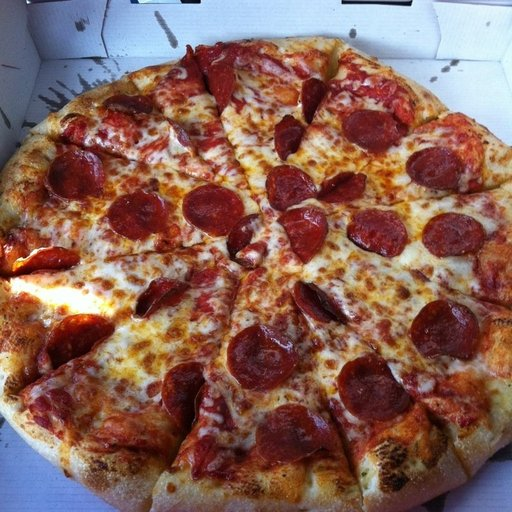

In [7]:
img=mpimg.imread("/content/pizza_steak/test/pizza/1001116.jpg")
img

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dtagen=ImageDataGenerator(rescale=1/255.)
test_dtagen=ImageDataGenerator(rescale=1/255.)

In [10]:
#lets apply the processes over data
train_data=train_dtagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            class_mode="binary",
                                            target_size=(224,224),
                                            shuffle=True,
                                            seed=42
)
test_data=test_dtagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            class_mode="binary",
                                            target_size=(224,224),
                                            shuffle=True,
                                            seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
#lets lokk at the shape and batch size closely
len(train_data)

47

In [12]:
1500/32

46.875

In [13]:
images,labels=train_data.next()

In [14]:
images[:1],labels[:1]

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [20]:
#lets create the model for our data
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3),
                           kernel_initializer="ones",
                           bias_initializer="zeros"
    ),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")
])
#lets compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_model1=model1.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data)
                          )

Epoch 1/5
47/47 [==============================] - 11s 123ms/step - loss: 17.6493 - accuracy: 0.5800 - val_loss: 0.7541 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6506 - accuracy: 0.6193 - val_loss: 0.6523 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.5122 - accuracy: 0.7360 - val_loss: 0.6779 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3923 - accuracy: 0.8227 - val_loss: 0.7523 - val_accuracy: 0.6520
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.2939 - accuracy: 0.8800 - val_loss: 0.8071 - val_accuracy: 0.6200


In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

<Axes: >

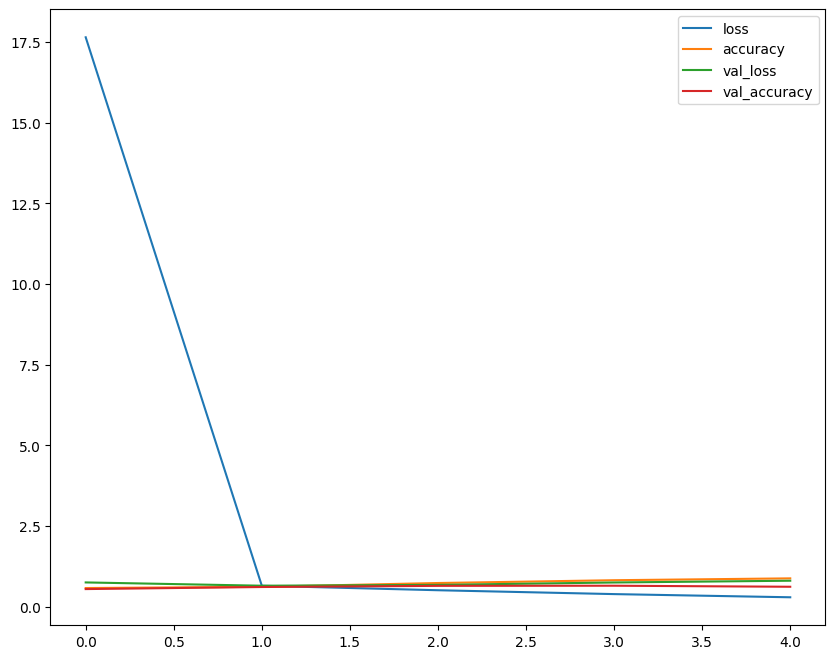

In [27]:
pd.DataFrame(history_model1.history).plot(figsize=(10,8))

In [29]:
#lets do the data augmentations to get more accuracy
train_data_aug=ImageDataGenerator(rescale=1/255.,
                                 rotation_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2)
test_data_aug=ImageDataGenerator(rescale=1/255.)

In [31]:
train_data_aug1=train_data_aug.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            class_mode="binary",
                                            target_size=(224,224),
                                            shuffle=True,
                                            seed=42
)


Found 1500 images belonging to 2 classes.


In [32]:
#model2
tf.random.set_seed(42)
#lets create the model for our data
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3),
                           kernel_initializer="ones",
                           bias_initializer="zeros"
    ),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(10,3,activation="relu"),
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1,activation="sigmoid")
])
#lets compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_model2=model2.fit(train_data_aug1,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug1),
                          validation_data=test_data,
                          validation_steps=len(test_data)
                          )

Epoch 1/5
47/47 [==============================] - 23s 462ms/step - loss: 2.8529 - accuracy: 0.5613 - val_loss: 0.6943 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6852 - accuracy: 0.5520 - val_loss: 0.6696 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.6694 - accuracy: 0.5907 - val_loss: 0.6585 - val_accuracy: 0.5900
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.6787 - accuracy: 0.6060 - val_loss: 0.6700 - val_accuracy: 0.5860
Epoch 5/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6631 - accuracy: 0.6413 - val_loss: 0.6775 - val_accuracy: 0.6200


<Axes: >

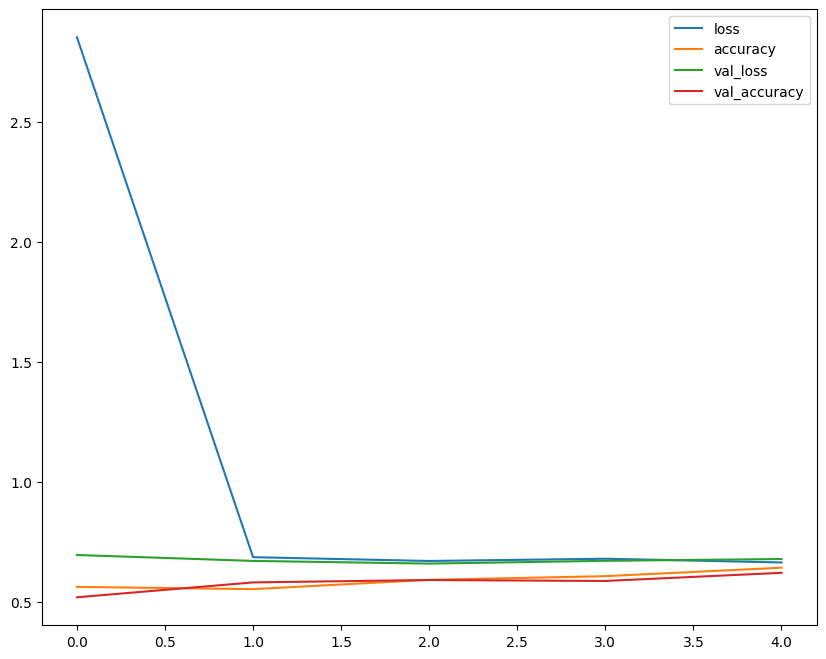

In [33]:
pd.DataFrame(history_model2.history).plot(figsize=(10,8))

In [50]:
!wget "C:\Users\ksale\Downloads\03-steak (1).jpeg"

--2024-09-07 05:39:26--  ftp://c/%5CUsers%5Cksale%5CDownloads%5C03-steak%20(1).jpeg
           => ‘\\Users\\ksale\\Downloads\\03-steak (1).jpeg’
Resolving c (c)... failed: Name or service not known.
wget: unable to resolve host address ‘c’


In [51]:
#lets create the helper function to read the image and convert to correct shape
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  #resacle the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  #expand ndim
  img=tf.expand_dims(img,axis=0)
  return img

In [52]:
steak=load_and_prep_image("/content/03-steak (1).jpeg")

In [54]:
model2.predict(steak)

1/1 [==============================] - 0s 54ms/step


array([[0.9429015]], dtype=float32)